# 🎓 Graduate Admission Prediction using Deep Learning (ANN)

This project predicts the **Chance of Admission** for a student based on academic and profile features using an **Artificial Neural Network (ANN)**.

### Problem Type
- Supervised Learning
- Regression Problem

### Target Variable
- Chance of Admit (range: 0–1)

In [83]:
import warnings
warnings.filterwarnings("ignore")

In [84]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [85]:
from tensorflow.keras.callbacks import EarlyStopping

In [86]:
df = pd.read_csv('Admission_Predict.csv')

In [87]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Data Cleaning

- Removed unnecessary columns
- Cleaned column names
- Checked for missing values

In [88]:
df.columns = df.columns.str.strip()

In [89]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [90]:
df.drop(columns=["Serial No."],inplace=True)

In [91]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [92]:
X = df.drop(columns='Chance of Admit')
y = df['Chance of Admit']

In [93]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [94]:
y 

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit, Length: 400, dtype: float64

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Feature Scaling

StandardScaler is applied only on input features.
Target variable is NOT scaled.


In [96]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [97]:
X_train_scaled

array([[ 0.45711129,  0.42466178, -0.057308  , ..., -1.05965163,
         0.13986648,  0.92761259],
       [ 0.1022887 ,  0.42466178, -0.057308  , ..., -0.50194025,
         0.36110014, -1.07803625],
       [ 2.05381293,  2.08593034,  1.6892215 , ...,  1.17119391,
         2.25009529,  0.92761259],
       ...,
       [-0.96217907, -0.40597251, -0.93057275, ..., -0.50194025,
        -0.62594237,  0.92761259],
       [-1.31700165, -1.40273364, -1.8038375 , ..., -1.61736302,
        -2.27668588, -1.07803625],
       [-0.25253389, -0.23984565, -0.93057275, ...,  0.05577114,
        -0.57488845, -1.07803625]], shape=(320, 7))

In [98]:
model = Sequential()

model.add(Dense(
    64,
    activation='relu',
    input_shape=(X_train.shape[1],),
    kernel_regularizer=l2(0.001)
))
model.add(Dropout(0.2))

model.add(Dense(
    32,
    activation='relu',
    kernel_regularizer=l2(0.001)
))
model.add(Dropout(0.2))

model.add(Dense(1, activation='linear'))

In [104]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 64)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,877 (30.77 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,252 (20.52 KB)

In [99]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=['mae', 'mse'],
)

In [100]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [101]:
X_train_scaled

array([[ 0.45711129,  0.42466178, -0.057308  , ..., -1.05965163,
         0.13986648,  0.92761259],
       [ 0.1022887 ,  0.42466178, -0.057308  , ..., -0.50194025,
         0.36110014, -1.07803625],
       [ 2.05381293,  2.08593034,  1.6892215 , ...,  1.17119391,
         2.25009529,  0.92761259],
       ...,
       [-0.96217907, -0.40597251, -0.93057275, ..., -0.50194025,
        -0.62594237,  0.92761259],
       [-1.31700165, -1.40273364, -1.8038375 , ..., -1.61736302,
        -2.27668588, -1.07803625],
       [-0.25253389, -0.23984565, -0.93057275, ...,  0.05577114,
        -0.57488845, -1.07803625]], shape=(320, 7))

In [102]:
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.1,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.3570 - mae: 0.4654 - mse: 0.3028 - val_loss: 0.1049 - val_mae: 0.1838 - val_mse: 0.0510
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1913 - mae: 0.3005 - mse: 0.1377 - val_loss: 0.0841 - val_mae: 0.1405 - val_mse: 0.0309
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1561 - mae: 0.2617 - mse: 0.1034 - val_loss: 0.0775 - val_mae: 0.1241 - val_mse: 0.0252
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1590 - mae: 0.2555 - mse: 0.1071 - val_loss: 0.0769 - val_mae: 0.1333 - val_mse: 0.0255
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1272 - mae: 0.2264 - mse: 0.0761 - val_loss: 0.0779 - val_mae: 0.1457 - val_mse: 0.0272
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1239 - mae: 0.2257 - mse: 0.0737 - val_loss: 0.0690 - val_mae: 0.1180 - val_mse: 0.0192
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1129 - mae: 0.1985 - mse: 0.0635 - val

In [103]:
loss, mae, mse = model.evaluate(X_test_scaled, y_test, verbose=0)

print(f"Test MAE: {mae}")
print(f"Test MSE: {mse}")
print(f"Test R2 Score: {r2_score(y_test, model.predict(X_test_scaled))}")

Test MAE: 0.04853900521993637
Test MSE: 0.004323867149651051
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Test R2 Score: 0.8325598663886415


In [106]:
# Predict on test data
y_pred = model.predict(X_test_scaled).flatten()

# Create a dataframe to compare
comparison = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Error': y_test.values - y_pred
})

# Display first 10 rows
comparison.head(10)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


,Actual,Predicted,Error
0,0.68,0.609873,0.070127
1,0.68,0.687039,-0.007039
2,0.90,0.912086,-0.012086
3,0.79,0.806920,-0.016920
4,0.44,0.556955,-0.116955
5,0.94,0.920797,0.019203
6,0.43,0.517651,-0.087651
7,0.36,0.525239,-0.165239
8,0.72,0.645794,0.074206
9,0.85,0.808091,0.041909


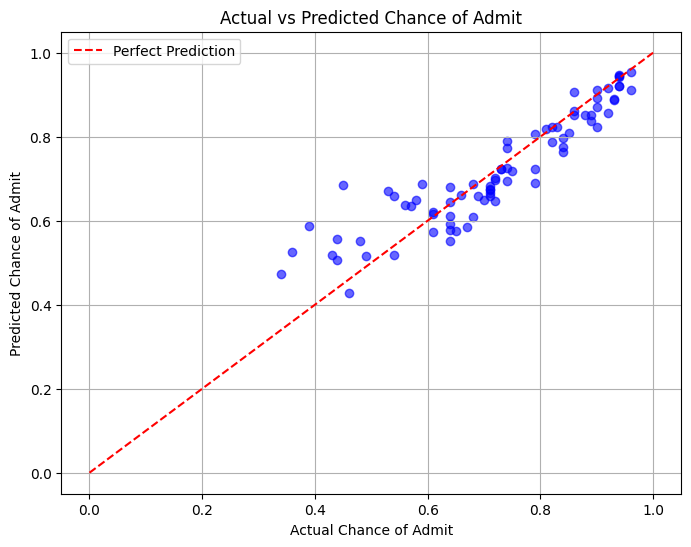

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([0,1], [0,1], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.title('Actual vs Predicted Chance of Admit')
plt.legend()
plt.grid(True)
plt.show()

## Conclusion

- The ANN model achieved a Mean Absolute Error of ~0.068
- The model generalizes well on unseen data
- Feature scaling and correct evaluation were critical for good performance
- This dataset is mostly linear, so ANN performs comparably to Linear Regression